# Nick Samsel Week 5 Assignment
## The following data visualizations are made from data pulled via the nba API


## Data Import

In [115]:
import pandas as pd
from nba_api.stats.endpoints import leaguegamefinder

# Function to fetch data for a given season
def fetch_season_data(season):
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable=season)
    games = gamefinder.get_data_frames()[0]
    return games

# List to hold data for all seasons
all_seasons_data = []

# Loop through each season from 1970 to the present
for year in range(1970, 2024):  # Adjust the end year as needed
    season = f"{year}-{str(year + 1)[-2:]}"
    print(f"Fetching data for season: {season}")
    season_data = fetch_season_data(season)
    all_seasons_data.append(season_data)

# Concatenate all season data into a single DataFrame
historic_nba_data = pd.concat(all_seasons_data, ignore_index=True)

# Save the data to a CSV file
historic_nba_data.to_csv('historic_nba_data.csv', index=False)

print("Data fetching complete. Saved to 'historic_nba_data.csv'.")

Fetching data for season: 1970-71
Fetching data for season: 1971-72
Fetching data for season: 1972-73
Fetching data for season: 1973-74
Fetching data for season: 1974-75
Fetching data for season: 1975-76
Fetching data for season: 1976-77
Fetching data for season: 1977-78
Fetching data for season: 1978-79
Fetching data for season: 1979-80
Fetching data for season: 1980-81
Fetching data for season: 1981-82
Fetching data for season: 1982-83
Fetching data for season: 1983-84
Fetching data for season: 1984-85
Fetching data for season: 1985-86
Fetching data for season: 1986-87
Fetching data for season: 1987-88
Fetching data for season: 1988-89
Fetching data for season: 1989-90
Fetching data for season: 1990-91
Fetching data for season: 1991-92
Fetching data for season: 1992-93
Fetching data for season: 1993-94
Fetching data for season: 1994-95
Fetching data for season: 1995-96
Fetching data for season: 1996-97
Fetching data for season: 1997-98
Fetching data for season: 1998-99
Fetching data 

/tmp/ipykernel_528568/1382511830.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  historic_nba_data = pd.concat(all_seasons_data, ignore_index=True)


Data fetching complete. Saved to 'historic_nba_data.csv'.


In [116]:
for column in historic_nba_data.columns:
    print(f"Column: {column}")
    print(historic_nba_data[column])
    print("\n") 

Column: SEASON_ID
0         41983
1         41983
2         41983
3         41983
4         41983
          ...  
122947    12023
122948    12023
122949    12023
122950    12023
122951    12023
Name: SEASON_ID, Length: 122952, dtype: object


Column: TEAM_ID
0         1610612747
1         1610612738
2         1610612747
3         1610612738
4         1610612738
             ...    
122947    1610612742
122948    1612709930
122949           104
122950           104
122951    1612709930
Name: TEAM_ID, Length: 122952, dtype: object


Column: TEAM_ABBREVIATION
0         LAL
1         BOS
2         LAL
3         BOS
4         BOS
         ... 
122947    DAL
122948    GLI
122949    PER
122950    PER
122951    GLI
Name: TEAM_ABBREVIATION, Length: 122952, dtype: object


Column: TEAM_NAME
0         Los Angeles Lakers
1             Boston Celtics
2         Los Angeles Lakers
3             Boston Celtics
4             Boston Celtics
                 ...        
122947      Dallas Mavericks
12294

## Data Manipulation and Preprocessing

In [117]:
#Read in data from csv file created via the API (saves a lot of time)

historic_nba_data = pd.read_csv('historic_nba_data.csv')
# Create a mapping of gameid to the opposing team's score
opposing_team_score_mapping = {}

for gameid in historic_nba_data['GAME_ID'].unique():
    game_data = historic_nba_data[historic_nba_data['GAME_ID'] == gameid]
    if len(game_data) == 2:
        team1, team2 = game_data.iloc[0], game_data.iloc[1]
        opposing_team_score_mapping[(gameid, team1['TEAM_NAME'])] = team2['PTS']
        opposing_team_score_mapping[(gameid, team2['TEAM_NAME'])] = team1['PTS']

# Add the opposing_team_score column
historic_nba_data['opposing_team_score'] = historic_nba_data.apply(
    lambda row: opposing_team_score_mapping.get((row['GAME_ID'], row['TEAM_NAME'])), axis=1
)

# Display the first few rows to verify
print(historic_nba_data.head())

teams_to_drop = ['East NBA All Stars East','West NBA All Stars West','Roanoke Dazzle', 'Asheville Altitude', 'North Charleston Lowgators', 'Columbus Riverdragons', 'Huntsville Flight', 'Fayetteville Patriots','Austin Toros', 'Albuquerque Thunderbirds', 'Tulsa 66er', ' Sophomores', ' Rookies', 'Fort Worth Flyers','Florida Flame', 'Tulsa 66ers', 'Arkansas RimRockers', 'H-Town H-Town', 'Clutch City Clutch City', 'Sophomores Sophomores', 'Rookies Rookies', 'Colorado 14ers', 'Dakota Wizards', 'Sioux Falls Skyforce', 'Idaho Stampede', 'Bakersfield Jam', 'Los Angeles D-Fenders', 'Anaheim Arsenal', 'DLeague West AllStars West', 'DLeague East AllStars East', 'Tel Aviv Maccabi Elite', 'Istanbul Efes Pilsen', 'Moscow CSKA', 'Khimki BC', 'Roma Virtus Lottomatica', 'Lyon-Villeurbanne Adecco ASVEL', 'Barcelona Winterthur FC', 'Utah Flash', 'Iowa Energy', 'Fort Wayne Mad Ants', 'Rio Grande Valley Vipers', 'DLeague Red All Stars Red', 'DLeague Blue All Stars Blue', 'Hornets Hornets', 'New Orleans New Orleans', 'Zalgiris Kaunas Zalgiris Kaunas', 'China Team China', 'Panathinaikos Panathinaikos', 'Real Madrid Real Madrid', 'MMT Estudiantes MMT Estudiantes', 'Unicaja Malaga Unicaja Malaga', 'Lottomatica Lottomatica Roma', 'Oklahoma City Thunder', 'Erie BayHawks', 'Reno Bighorns', 'West Sunsetters Sunsetters', 'East Sunrisers Sunrisers', 'Vilnius Lietuvos Rytas', 'Barcelona Regal FC', 'Maine Red Claws', 'Springfield Armor', 'East Dallas Dallas', 'West Celebrities West', 'Athens Olympiacos', 'Belegrade Partizan', 'Texas Legends', 'New Mexico Thunderbirds', 'East Celebrities East', 'Vitoria Caja Laboral', 'Haifa Maccabi Haifa', 'Milano Armani Jeans Milano', 'Canton Charge', 'Team Shaq Team Shaq', 'Team Chuck Team Chuck', 'Brooklyn Nets', 'Santa Cruz Warriors', 'DLeague Futures AllStars Futures', 'DLeague Prospects AllStars Prospects', 'Team Shaq', 'Team Chuck', 'Barcelona FC Barcelona Regal', 'Siena Montepaschi Siena', 'Madrid Real Madrid', 'Milano EA7 Emporio Armani Milano', 'Berlin Alba Berlin', 'Istanbul Fenerbahce Ulker', 'New Orleans Pelicans', 'Delaware 87ers', 'Team Hill', 'Team Webber', 'Tampico Huracanes de Tampico', 'Bilbao Basket', 'Austin Spurs', 'Oklahoma City Blue', 'Grand Rapids Drive', 'Westchester Knicks', 'Eastern Conference Futures', 'Western Conference Prospects', 'World World', 'USA USA', 'Monterrey Fuerza Regia', 'Flamengo Flamengo', 'Tel Aviv Maccabi Electra', 'LA Clippers', 'Raptors 905', 'East NBADL All Stars East', 'West NBADL All Stars West', 'USA Celebrities USA', 'Canada Celebrities Canada', 'London London Lightning', 'Bauru Paschoalotto/Bauru', 'Istanbul Fenerbahce Sports Club', 'Milano Olimpia Milano', 'Windy City Bulls', 'Northern Arizona Suns', 'Salt Lake City Stars', 'Long Island Nets', 'Greensboro Swarm', 'Buenos Aires San Lorenzo', 'Barcelona FC Barcelona Lassa', 'Shanghai Shanghai Sharks', 'South Bay Lakers', 'Lakeland Magic', 'Memphis Hustle', 'Agua Caliente Clippers', 'Iowa Wolves', 'Wisconsin Herd', 'Mexico National Team Mexico National Team', 'Team Stephen', 'NBA G League USA NBA G League USA', 'Team LeBron', 'Brisbane Bullets', 'Melbourne United', 'Shanghai Sharks', 'Sydney Kings', 'Guangzhou Long-Lions', 'Stockton Kings', 'Delaware Blue Coats', 'Capital City Go-Go', 'Team Giannis', 'Away Away', 'Home Home', 'Team Mexico', 'Adelaide 36ers', 'Perth Wildcats', 'New Zealand Breakers', 'Beijing Ducks', 'College Park Skyhawks', 'All-Star Giannis', 'All-Star LeBron', 'Team Stephen A', 'Team Wilbon', 'SESI/Franca Basketball Club of Brazil', 'G League Ignite', 'Team Durant', 'Motor City Cruise', 'Birmingham Squadron', 'Grand Rapids Gold', 'Cleveland Charge', 'Maine Celtics', 'Team Payton', 'Team Isiah', 'Team Nique', 'Team Barry', 'Team Worthy', 'Team Walton', 'Ciudad de Mexico Capitanes', 'Osceola Magic', 'Mexico City Capitanes', 'Ontario Clippers', 'Team Luka', 'Team Scoot', 'Team Deron', 'Team Jason', 'Team Joakim', 'Team Pau', 'Team Ryan', 'Team Dwyane', "Ra'anana Maccabi Ra'anana", 'Rip City Remix', 'Team StrictlyBball', 'Team Giraffe Stars', 'Team EarnYourLeisure', 'Team BallisLife', 'Team Jalen', 'Team Detlef', 'Team Shannon', 'Team Tamika', 'Cairns Taipans', 'Madrid Baloncesto']
historic_nba_data = historic_nba_data[~historic_nba_data['TEAM_NAME'].isin(teams_to_drop)]

   SEASON_ID     TEAM_ID TEAM_ABBREVIATION           TEAM_NAME   GAME_ID  \
0      41983  1610612747               LAL  Los Angeles Lakers  48300079   
1      41983  1610612738               BOS      Boston Celtics  48300079   
2      41983  1610612747               LAL  Los Angeles Lakers  48300078   
3      41983  1610612738               BOS      Boston Celtics  48300078   
4      41983  1610612738               BOS      Boston Celtics  48300077   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  OREB  DREB  REB  AST   STL  BLK  \
0  1984-06-12    LAL @ BOS  L  240  102  ...   9.0  24.0   33   28   9.0    8   
1  1984-06-12  BOS vs. LAL  W  240  111  ...  20.0  32.0   52   18  11.0    3   
2  1984-06-10  LAL vs. BOS  W  240  119  ...  19.0  25.0   44   31   9.0    3   
3  1984-06-10    BOS @ LAL  L  240  108  ...  13.0  28.0   41   25   7.0    8   
4  1984-06-08  BOS vs. LAL  W  240  121  ...  13.0  38.0   51   28   8.0    5   

   TOV  PF  PLUS_MINUS  opposing_team_score  
0   17  32

In [118]:
# Drop columns that are not needed
historic_nba_data['SEASON'] = historic_nba_data['SEASON_ID'].astype(str).str[1:]
historic_nba_data['Win Percentage'] = historic_nba_data['WL'].apply(lambda x: 1 if x == 'W' else 0)
historic_nba_data.drop(['TEAM_ID', 'TEAM_ABBREVIATION','GAME_ID','GAME_DATE','MATCHUP','WL','MIN','SEASON_ID'], axis=1, inplace=True)

# Calculate the sum of wins by SEASON and TEAM_NAME
wins_data = historic_nba_data.groupby(['SEASON', 'TEAM_NAME'])['Win Percentage'].sum().reset_index()

# Calculate the mean for the rest of the columns
grouped_data = historic_nba_data.groupby(['SEASON', 'TEAM_NAME']).mean().reset_index()

# Display the first few rows to verify
print(grouped_data.head())

  SEASON            TEAM_NAME         PTS        FGM        FGA    FG_PCT  \
0   1983        Atlanta Hawks  101.252874  39.149425  83.045977  0.473563   
1   1983       Boston Celtics  111.885714  43.504762  88.076190  0.496076   
2   1983        Chicago Bulls  103.890244  40.402439  85.182927  0.476537   
3   1983  Cleveland Cavaliers  102.512195  41.085366  88.475610  0.466171   
4   1983     Dallas Mavericks  109.445652  43.641304  88.434783  0.494587   

       FG3M      FG3A   FG3_PCT        FTM  ...       DREB        REB  \
0  0.287356  1.344828  0.233911  22.666667  ...  27.068966  40.632184   
1  0.723810  2.761905  0.262344  24.152381  ...  30.390476  44.819048   
2  0.243902  1.414634  0.138966  22.841463  ...  27.670732  41.963415   
3  0.524390  2.000000  0.225486  19.817073  ...  29.121951  43.914634   
4  0.510870  2.315217  0.217921  21.652174  ...  27.565217  41.141304   

         AST       STL       BLK        TOV         PF  PLUS_MINUS  \
0  22.183908  7.639535  6.67

In [119]:
# Get unique values in the 'TEAM_NAME' column
unique_team_names = grouped_data['TEAM_NAME'].unique()

# Print the unique team names
print(unique_team_names)

['Atlanta Hawks' 'Boston Celtics' 'Chicago Bulls' 'Cleveland Cavaliers'
 'Dallas Mavericks' 'Denver Nuggets' 'Detroit Pistons'
 'Golden State Warriors' 'Houston Rockets' 'Indiana Pacers'
 'Kansas City Kings' 'Los Angeles Lakers' 'Milwaukee Bucks'
 'New Jersey Nets' 'New York Knicks' 'Philadelphia 76ers' 'Phoenix Suns'
 'Portland Trail Blazers' 'San Antonio Spurs' 'San Diego Clippers'
 'Seattle SuperSonics' 'Utah Jazz' 'Washington Bullets'
 'Los Angeles Clippers' 'Sacramento Kings' 'Charlotte Hornets'
 'Miami Heat' 'Minnesota Timberwolves' 'Orlando Magic' 'Toronto Raptors'
 'Vancouver Grizzlies' 'Washington Wizards' 'Memphis Grizzlies'
 'New Orleans Hornets' 'Charlotte Bobcats'
 'New Orleans/Oklahoma City Hornets']


## Charts!

### Cool Charts I wont use in my presentation

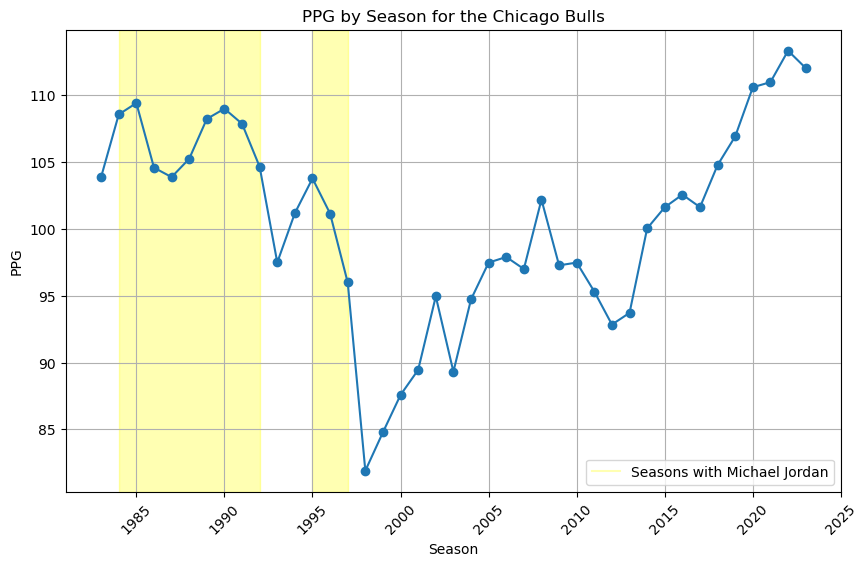

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming grouped_data is already loaded or created
# If you need to load it from a CSV file, uncomment the following line:
# grouped_data = pd.read_csv('grouped_data.csv')

# Filter the DataFrame for the Chicago Bulls
bulls_data = grouped_data[grouped_data['TEAM_NAME'] == 'Chicago Bulls']

# Group by season and calculate the total points
points_by_season = bulls_data.groupby('SEASON')['PTS'].sum().reset_index()

# Convert 'SEASON' to integer for easier comparison
points_by_season['SEASON'] = points_by_season['SEASON'].astype(int)

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(points_by_season['SEASON'], points_by_season['PTS'], marker='o', linestyle='-')

# Highlight the segments
plt.axvspan(1984, 1992, color='yellow', alpha=0.3)
plt.axvspan(1995, 1997, color='yellow', alpha=0.3)

# Add a custom legend
plt.plot([], [], color='yellow', alpha=0.3, label='Seasons with Michael Jordan')

plt.title('PPG by Season for the Chicago Bulls')
plt.xlabel('Season')
plt.ylabel('PPG')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

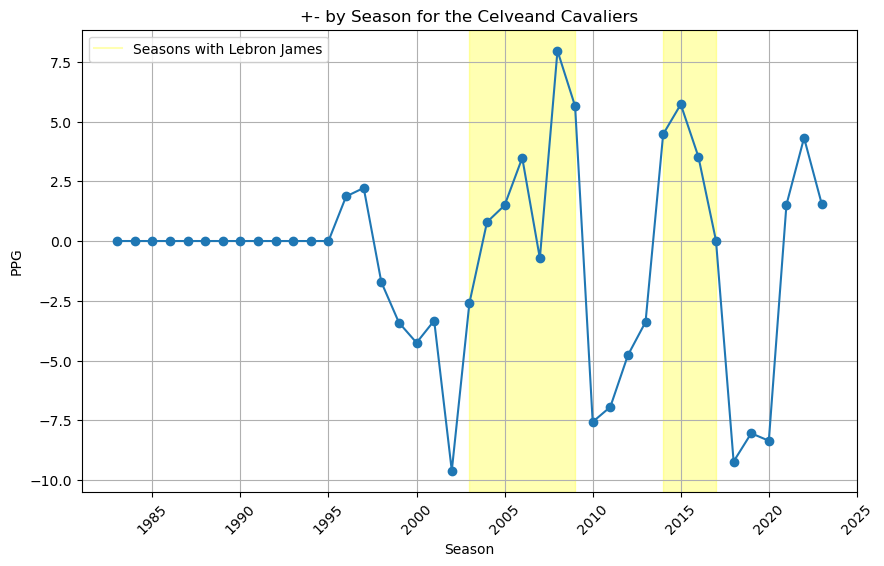

In [121]:
# Filter the DataFrame for the Celeveland Cavaliers
cavaliers_data = grouped_data[grouped_data['TEAM_NAME'] == 'Cleveland Cavaliers']

# Group by season and calculate the total points
points_by_season = cavaliers_data.groupby('SEASON')['PLUS_MINUS'].sum().reset_index()

# Convert 'SEASON' to integer for easier comparison
points_by_season['SEASON'] = points_by_season['SEASON'].astype(int)

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(points_by_season['SEASON'], points_by_season['PLUS_MINUS'], marker='o', linestyle='-')

# Highlight the segments
plt.axvspan(2003, 2009, color='yellow', alpha=0.3)
plt.axvspan(2014, 2017, color='yellow', alpha=0.3)

# Add a custom legend
plt.plot([], [], color='yellow', alpha=0.3, label='Seasons with Lebron James')

plt.title('+- by Season for the Celveand Cavaliers')
plt.xlabel('Season')
plt.ylabel('PPG')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

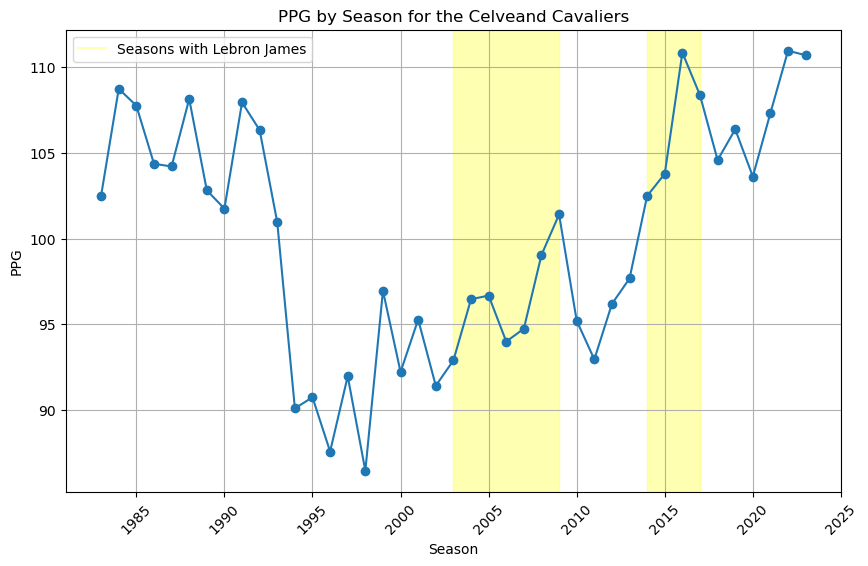

In [122]:
# Filter the DataFrame for the Celeveland Cavaliers
cavaliers_data = grouped_data[grouped_data['TEAM_NAME'] == 'Cleveland Cavaliers']

# Group by season and calculate the total points
points_by_season = cavaliers_data.groupby('SEASON')['PTS'].sum().reset_index()

# Convert 'SEASON' to integer for easier comparison
points_by_season['SEASON'] = points_by_season['SEASON'].astype(int)

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(points_by_season['SEASON'], points_by_season['PTS'], marker='o', linestyle='-')

# Highlight the segments
plt.axvspan(2003, 2009, color='yellow', alpha=0.3)
plt.axvspan(2014, 2017, color='yellow', alpha=0.3)

# Add a custom legend
plt.plot([], [], color='yellow', alpha=0.3, label='Seasons with Lebron James')

plt.title('PPG by Season for the Celveand Cavaliers')
plt.xlabel('Season')
plt.ylabel('PPG')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

### Charts for slideshow

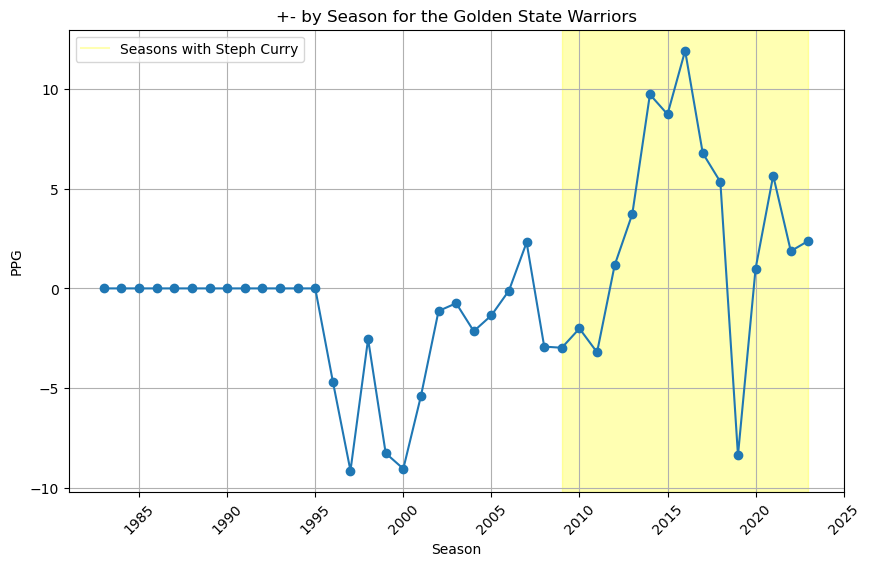

In [123]:
# Filter the DataFrame for the Celeveland Cavaliers
warriors_data = grouped_data[grouped_data['TEAM_NAME'] == 'Golden State Warriors']

# Group by season and calculate the total points
points_by_season = warriors_data.groupby('SEASON')['PLUS_MINUS'].sum().reset_index()

# Convert 'SEASON' to integer for easier comparison
points_by_season['SEASON'] = points_by_season['SEASON'].astype(int)

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(points_by_season['SEASON'], points_by_season['PLUS_MINUS'], marker='o', linestyle='-')

# Highlight the segments
plt.axvspan(2009, 2023, color='yellow', alpha=0.3)




# Add a custom legend
plt.plot([], [], color='yellow', alpha=0.3, label='Seasons with Steph Curry')

plt.title('+- by Season for the Golden State Warriors')
plt.xlabel('Season')
plt.ylabel('PPG')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

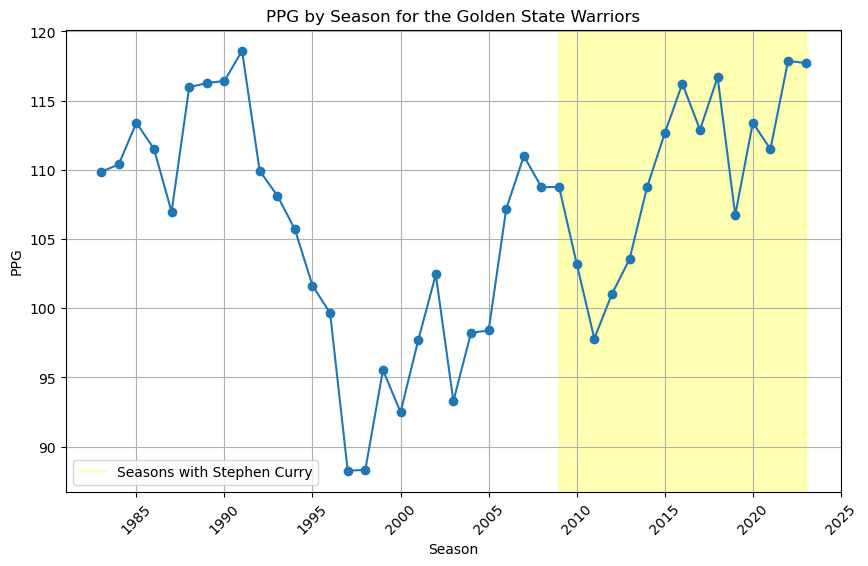

In [124]:
# Filter the DataFrame for the Golden State Warriors
warriors_data = grouped_data[grouped_data['TEAM_NAME'] == 'Golden State Warriors']


# Group by season and calculate the total points
points_by_season = warriors_data.groupby('SEASON')['PTS'].sum().reset_index()

# Convert 'SEASON' to integer for easier comparison
points_by_season['SEASON'] = points_by_season['SEASON'].astype(int)

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(points_by_season['SEASON'], points_by_season['PTS'], marker='o', linestyle='-')

# Highlight the segments
plt.axvspan(2009, 2023, color='yellow', alpha=0.3)



# Add a custom legend
plt.plot([], [], color='yellow', alpha=0.3, label='Seasons with Stephen Curry')

plt.title('PPG by Season for the Golden State Warriors')
plt.xlabel('Season')
plt.ylabel('PPG')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [125]:


# Convert relevant columns to numeric data types
grouped_data['PTS'] = pd.to_numeric(grouped_data['PTS'])
grouped_data['PLUS_MINUS'] = pd.to_numeric(grouped_data['PLUS_MINUS'])

# Separate Golden State Warriors data
gsw_data = grouped_data[grouped_data['TEAM_NAME'] == 'Golden State Warriors']

# Calculate the average for all teams except Golden State Warriors, grouped by season
other_teams_avg = grouped_data[grouped_data['TEAM_NAME'] != 'Golden State Warriors'].groupby('SEASON').mean(numeric_only=True).reset_index()
other_teams_avg['TEAM_NAME'] = 'All Other Teams'

# Combine the Golden State Warriors data with the average of the other teams
result_df = pd.concat([gsw_data, bulls_data, other_teams_avg], ignore_index=True)

print(result_df)

    SEASON              TEAM_NAME         PTS        FGM        FGA    FG_PCT  \
0     1983  Golden State Warriors  109.853659  42.914634  91.878049  0.468622   
1     1984  Golden State Warriors  110.390244  42.658537  92.121951  0.464659   
2     1985  Golden State Warriors  113.402439  44.512195  92.268293  0.483817   
3     1986  Golden State Warriors  111.510870  43.184783  90.271739  0.479533   
4     1987  Golden State Warriors  106.963415  42.231707  90.292683  0.469427   
..     ...                    ...         ...        ...        ...       ...   
118   2019        All Other Teams  111.123287  40.544812  88.446710  0.459453   
119   2020        All Other Teams  111.474404  40.927334  88.487218  0.463238   
120   2021        All Other Teams  110.357123  40.452267  87.972439  0.460657   
121   2022        All Other Teams  113.913046  41.666301  88.250903  0.473354   
122   2023        All Other Teams  113.182582  41.746200  88.689425  0.471539   

          FG3M       FG3A  

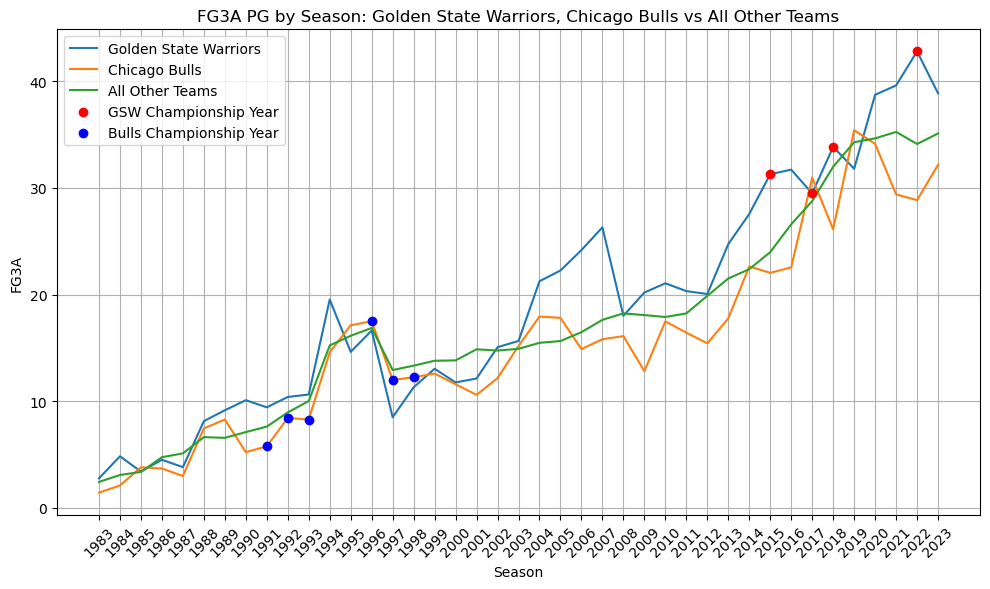

In [126]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure SEASON is treated as a categorical variable for proper plotting
result_df['SEASON'] = pd.Categorical(result_df['SEASON'], ordered=True)

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot Golden State Warriors data
gsw_data = result_df[result_df['TEAM_NAME'] == 'Golden State Warriors']
plt.plot(gsw_data['SEASON'], gsw_data['FG3A'], label='Golden State Warriors')

# Plot Chicago Bulls data
bulls_data = result_df[result_df['TEAM_NAME'] == 'Chicago Bulls']
plt.plot(bulls_data['SEASON'], bulls_data['FG3A'], label='Chicago Bulls')

# Plot All Other Teams data
other_teams_data = result_df[result_df['TEAM_NAME'] == 'All Other Teams']
plt.plot(other_teams_data['SEASON'], other_teams_data['FG3A'], label='All Other Teams')

# Highlight specific points for championship years
championship_years = ['2015', '2017', '2018', '2022']
bchampionship_years = ['1991', '1992', '1993', '1996', '1997', '1998']
championship_gsw_data = gsw_data[gsw_data['SEASON'].isin(championship_years)]
championship_bulls_data = bulls_data[bulls_data['SEASON'].isin(bchampionship_years)]

plt.scatter(championship_gsw_data['SEASON'], championship_gsw_data['FG3A'], color='red', zorder=5, label='GSW Championship Year')
plt.scatter(championship_bulls_data['SEASON'], championship_bulls_data['FG3A'], color='blue', zorder=5, label='Bulls Championship Year')

# Adding titles and labels
plt.title('FG3A PG by Season: Golden State Warriors, Chicago Bulls vs All Other Teams')
plt.xlabel('Season')
plt.ylabel('FG3A')
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

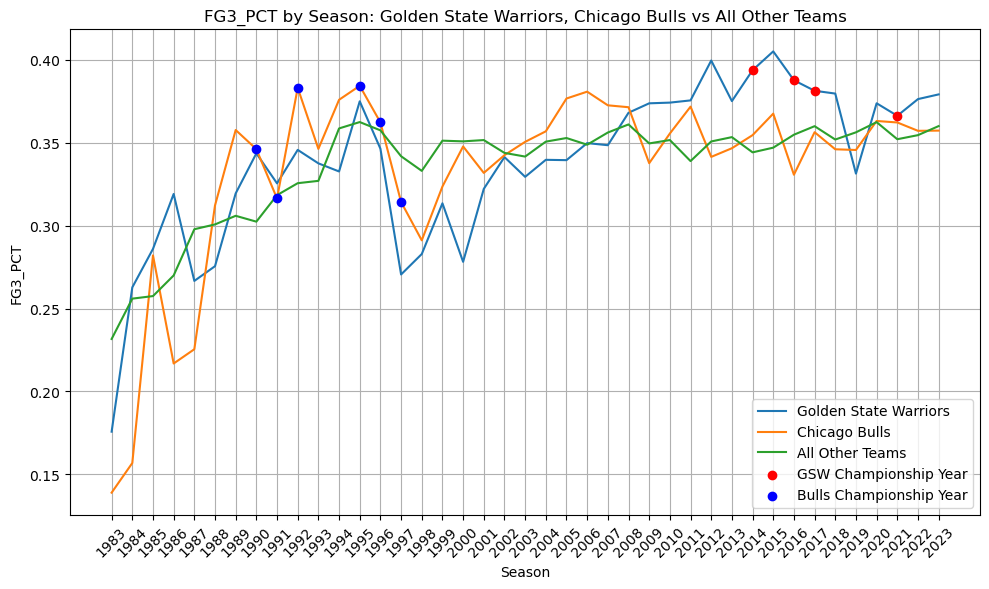

In [127]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure SEASON is treated as a categorical variable for proper plotting
result_df['SEASON'] = pd.Categorical(result_df['SEASON'], ordered=True)

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot Golden State Warriors data
gsw_data = result_df[result_df['TEAM_NAME'] == 'Golden State Warriors']
plt.plot(gsw_data['SEASON'], gsw_data['FG3_PCT'], label='Golden State Warriors')

# Plot Chicago Bulls data
bulls_data = result_df[result_df['TEAM_NAME'] == 'Chicago Bulls']
plt.plot(bulls_data['SEASON'], bulls_data['FG3_PCT'], label='Chicago Bulls')

# Plot All Other Teams data
other_teams_data = result_df[result_df['TEAM_NAME'] == 'All Other Teams']
plt.plot(other_teams_data['SEASON'], other_teams_data['FG3_PCT'], label='All Other Teams')



# Highlight specific points for championship years
championship_years = ['2014', '2016', '2017', '2021']
bchampionship_years = ['1990', '1991', '1992', '1995', '1996', '1997']
championship_gsw_data = gsw_data[gsw_data['SEASON'].isin(championship_years)]
championship_bulls_data = bulls_data[bulls_data['SEASON'].isin(bchampionship_years)]

plt.scatter(championship_gsw_data['SEASON'], championship_gsw_data['FG3_PCT'], color='red', zorder=5, label='GSW Championship Year')
plt.scatter(championship_bulls_data['SEASON'], championship_bulls_data['FG3_PCT'], color='blue', zorder=5, label='Bulls Championship Year')

# Adding titles and labels
plt.title('FG3_PCT by Season: Golden State Warriors, Chicago Bulls vs All Other Teams')
plt.xlabel('Season')
plt.ylabel('FG3_PCT')
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

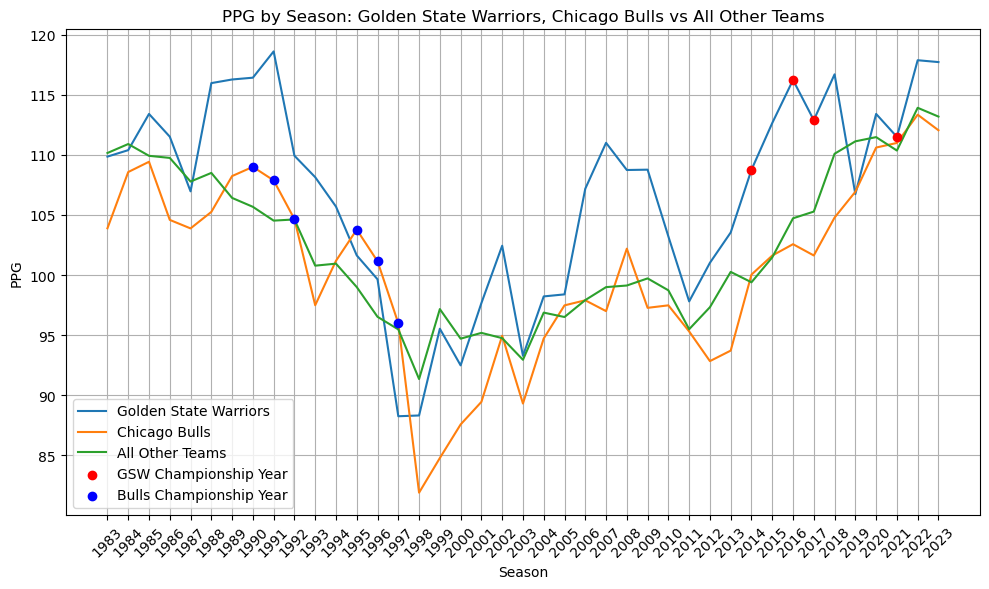

In [128]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure SEASON is treated as a categorical variable for proper plotting
result_df['SEASON'] = pd.Categorical(result_df['SEASON'], ordered=True)

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot Golden State Warriors data
gsw_data = result_df[result_df['TEAM_NAME'] == 'Golden State Warriors']
plt.plot(gsw_data['SEASON'], gsw_data['PTS'], label='Golden State Warriors')

# Plot Chicago Bulls data
bulls_data = result_df[result_df['TEAM_NAME'] == 'Chicago Bulls']
plt.plot(bulls_data['SEASON'], bulls_data['PTS'], label='Chicago Bulls')

# Plot All Other Teams data
other_teams_data = result_df[result_df['TEAM_NAME'] == 'All Other Teams']
plt.plot(other_teams_data['SEASON'], other_teams_data['PTS'], label='All Other Teams')



# Highlight specific points for championship years
championship_years = ['2014', '2016', '2017', '2021']
bchampionship_years = ['1990', '1991', '1992', '1995', '1996', '1997']
championship_gsw_data = gsw_data[gsw_data['SEASON'].isin(championship_years)]
championship_bulls_data = bulls_data[bulls_data['SEASON'].isin(bchampionship_years)]

plt.scatter(championship_gsw_data['SEASON'], championship_gsw_data['PTS'], color='red', zorder=5, label='GSW Championship Year')
plt.scatter(championship_bulls_data['SEASON'], championship_bulls_data['PTS'], color='blue', zorder=5, label='Bulls Championship Year')

# Adding titles and labels
plt.title('PPG by Season: Golden State Warriors, Chicago Bulls vs All Other Teams')
plt.xlabel('Season')
plt.ylabel('PPG')
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

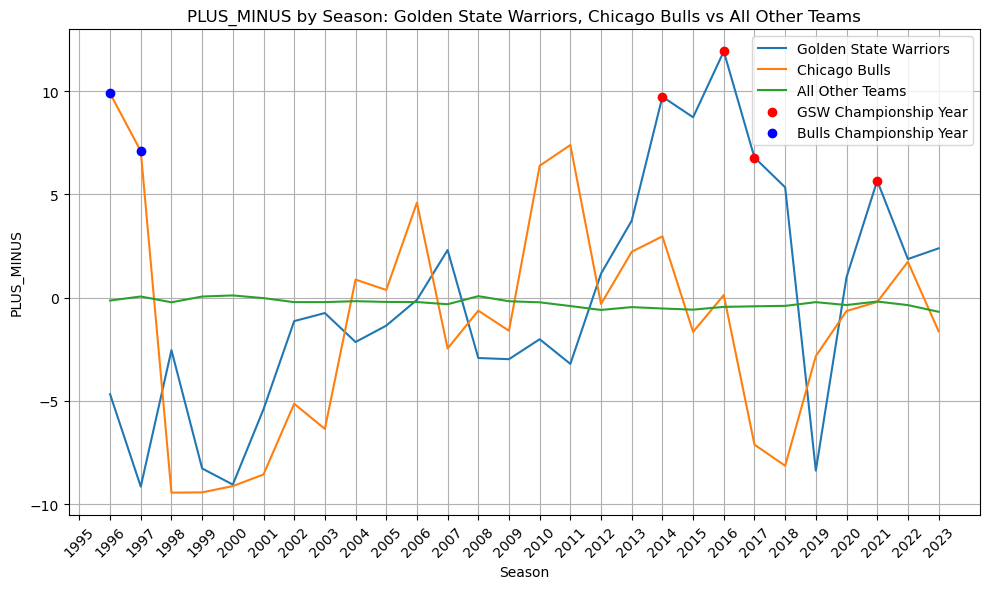

In [129]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure SEASON is treated as a categorical variable for proper plotting
result_df['SEASON'] = pd.Categorical(result_df['SEASON'], ordered=True)

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot Golden State Warriors data
gsw_data = result_df[result_df['TEAM_NAME'] == 'Golden State Warriors']
plt.plot(gsw_data['SEASON'], gsw_data['PLUS_MINUS'], label='Golden State Warriors')

# Plot Chicago Bulls data
bulls_data = result_df[result_df['TEAM_NAME'] == 'Chicago Bulls']
plt.plot(bulls_data['SEASON'], bulls_data['PLUS_MINUS'], label='Chicago Bulls')

# Plot All Other Teams data
other_teams_data = result_df[result_df['TEAM_NAME'] == 'All Other Teams']
plt.plot(other_teams_data['SEASON'], other_teams_data['PLUS_MINUS'], label='All Other Teams')

# Highlight specific points for championship years
championship_years = ['2014', '2016', '2017', '2021']
bchampionship_years = ['1990', '1991', '1992', '1995', '1996', '1997']
championship_gsw_data = gsw_data[gsw_data['SEASON'].isin(championship_years)]
championship_bulls_data = bulls_data[bulls_data['SEASON'].isin(bchampionship_years)]

plt.scatter(championship_gsw_data['SEASON'], championship_gsw_data['PLUS_MINUS'], color='red', zorder=5, label='GSW Championship Year')
plt.scatter(championship_bulls_data['SEASON'], championship_bulls_data['PLUS_MINUS'], color='blue', zorder=5, label='Bulls Championship Year')

# Adding titles and labels
plt.title('PLUS_MINUS by Season: Golden State Warriors, Chicago Bulls vs All Other Teams')
plt.xlabel('Season')
plt.ylabel('PLUS_MINUS')
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

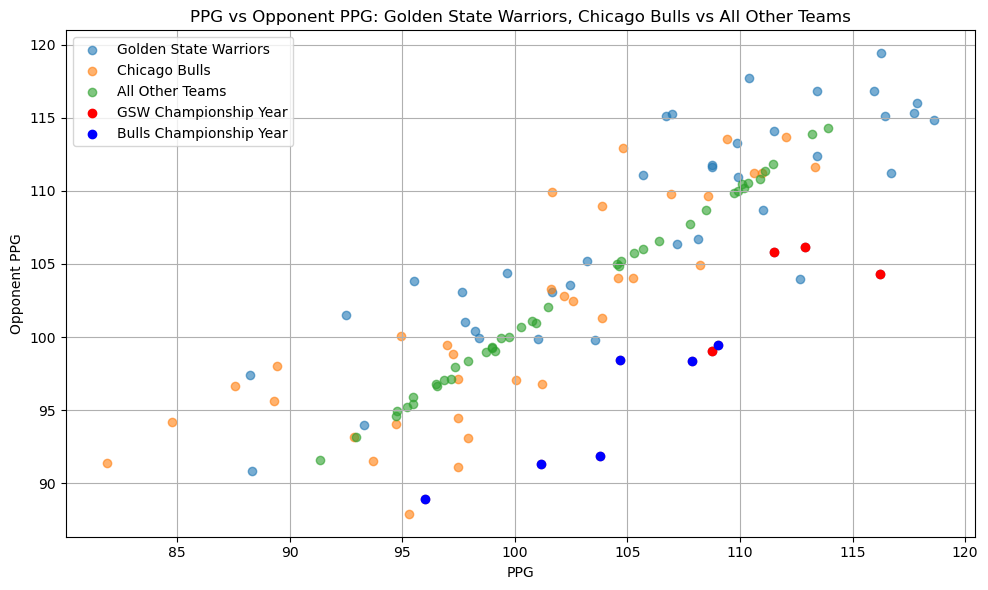

In [130]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot Golden State Warriors data
gsw_data = result_df[result_df['TEAM_NAME'] == 'Golden State Warriors']
plt.scatter(gsw_data['PTS'], gsw_data['opposing_team_score'], label='Golden State Warriors', alpha=0.6)

# Plot Chicago Bulls data
bulls_data = result_df[result_df['TEAM_NAME'] == 'Chicago Bulls']
plt.scatter(bulls_data['PTS'], bulls_data['opposing_team_score'], label='Chicago Bulls', alpha=0.6)

# Plot All Other Teams data
other_teams_data = result_df[result_df['TEAM_NAME'] == 'All Other Teams']
plt.scatter(other_teams_data['PTS'], other_teams_data['opposing_team_score'], label='All Other Teams', alpha=0.6)

# Highlight specific points for championship years
championship_years = ['2014', '2016', '2017', '2021']
bchampionship_years = ['1990', '1991', '1992', '1995', '1996', '1997']
championship_gsw_data = gsw_data[gsw_data['SEASON'].isin(championship_years)]
championship_bulls_data = bulls_data[bulls_data['SEASON'].isin(bchampionship_years)]

plt.scatter(championship_gsw_data['PTS'], championship_gsw_data['opposing_team_score'], color='red', zorder=5, label='GSW Championship Year')
plt.scatter(championship_bulls_data['PTS'], championship_bulls_data['opposing_team_score'], color='blue', zorder=5, label='Bulls Championship Year')

# Adding titles and labels
plt.title('PPG vs Opponent PPG: Golden State Warriors, Chicago Bulls vs All Other Teams')
plt.xlabel('PPG')
plt.ylabel('Opponent PPG')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

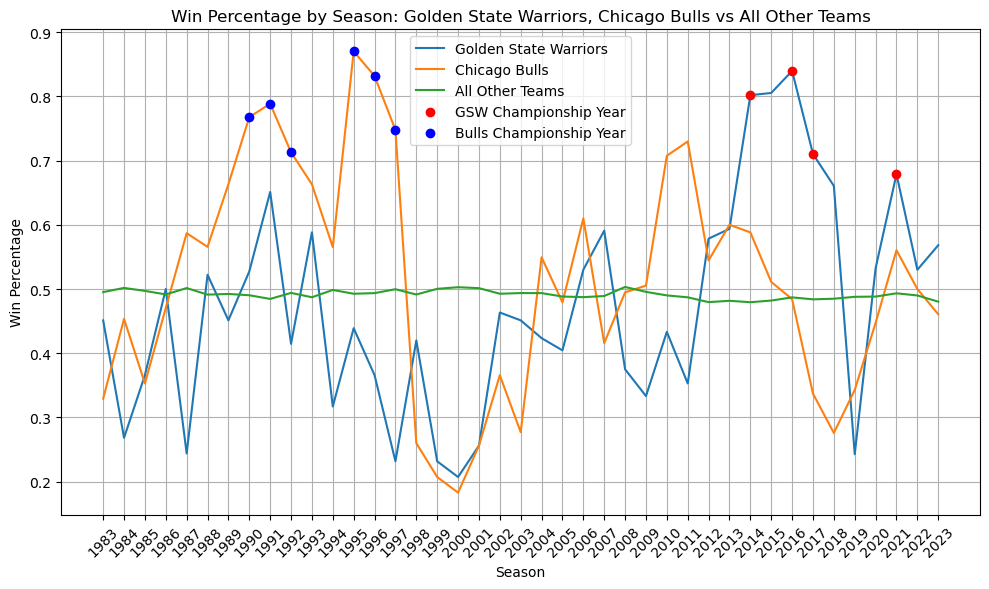

In [131]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure SEASON is treated as a categorical variable for proper plotting
result_df['SEASON'] = pd.Categorical(result_df['SEASON'], ordered=True)

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot Golden State Warriors data
gsw_data = result_df[result_df['TEAM_NAME'] == 'Golden State Warriors']
plt.plot(gsw_data['SEASON'], gsw_data['Win Percentage'], label='Golden State Warriors')

# Plot Chicago Bulls data
bulls_data = result_df[result_df['TEAM_NAME'] == 'Chicago Bulls']
plt.plot(bulls_data['SEASON'], bulls_data['Win Percentage'], label='Chicago Bulls')

# Plot All Other Teams data
other_teams_data = result_df[result_df['TEAM_NAME'] == 'All Other Teams']
plt.plot(other_teams_data['SEASON'], other_teams_data['Win Percentage'], label='All Other Teams')

# Highlight specific points for championship years
championship_years = ['2014', '2016', '2017', '2021']
bchampionship_years = ['1990', '1991', '1992', '1995', '1996', '1997']
championship_gsw_data = gsw_data[gsw_data['SEASON'].isin(championship_years)]
championship_bulls_data = bulls_data[bulls_data['SEASON'].isin(bchampionship_years)]

plt.scatter(championship_gsw_data['SEASON'], championship_gsw_data['Win Percentage'], color='red', zorder=5, label='GSW Championship Year')
plt.scatter(championship_bulls_data['SEASON'], championship_bulls_data['Win Percentage'], color='blue', zorder=5, label='Bulls Championship Year')

# Adding titles and labels
plt.title('Win Percentage by Season: Golden State Warriors, Chicago Bulls vs All Other Teams')
plt.xlabel('Season')
plt.ylabel('Win Percentage')
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

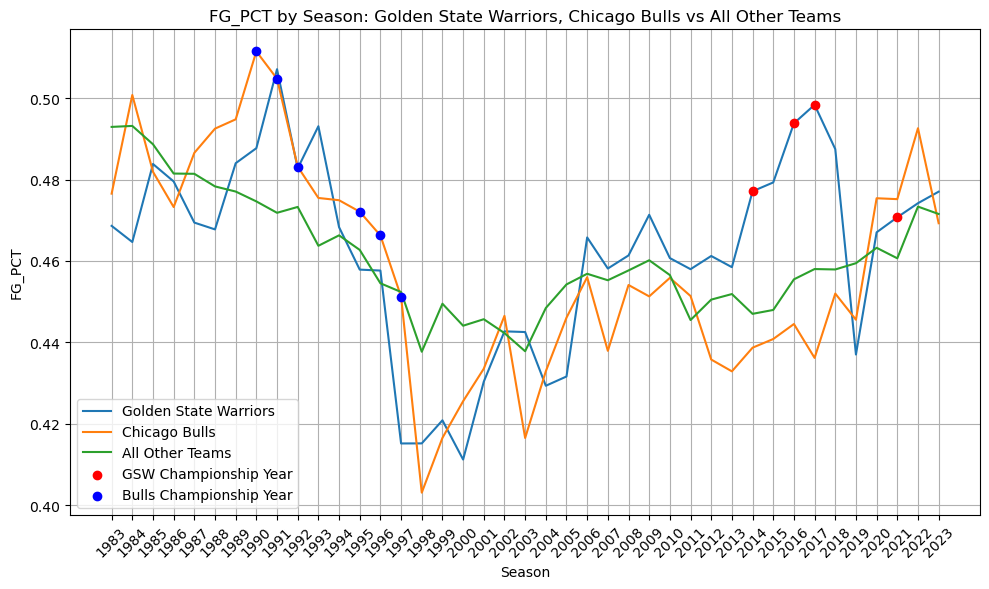

In [133]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure SEASON is treated as a categorical variable for proper plotting
result_df['SEASON'] = pd.Categorical(result_df['SEASON'], ordered=True)

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot Golden State Warriors data
gsw_data = result_df[result_df['TEAM_NAME'] == 'Golden State Warriors']
plt.plot(gsw_data['SEASON'], gsw_data['FG_PCT'], label='Golden State Warriors')

# Plot Chicago Bulls data
bulls_data = result_df[result_df['TEAM_NAME'] == 'Chicago Bulls']
plt.plot(bulls_data['SEASON'], bulls_data['FG_PCT'], label='Chicago Bulls')

# Plot All Other Teams data
other_teams_data = result_df[result_df['TEAM_NAME'] == 'All Other Teams']
plt.plot(other_teams_data['SEASON'], other_teams_data['FG_PCT'], label='All Other Teams')

# Highlight specific points for championship years
championship_years = ['2014', '2016', '2017', '2021']
bchampionship_years = ['1990', '1991', '1992', '1995', '1996', '1997']
championship_gsw_data = gsw_data[gsw_data['SEASON'].isin(championship_years)]
championship_bulls_data = bulls_data[bulls_data['SEASON'].isin(bchampionship_years)]

plt.scatter(championship_gsw_data['SEASON'], championship_gsw_data['FG_PCT'], color='red', zorder=5, label='GSW Championship Year')
plt.scatter(championship_bulls_data['SEASON'], championship_bulls_data['FG_PCT'], color='blue', zorder=5, label='Bulls Championship Year')

# Adding titles and labels
plt.title('FG_PCT by Season: Golden State Warriors, Chicago Bulls vs All Other Teams')
plt.xlabel('Season')
plt.ylabel('FG_PCT')
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()